In [1]:
import pandas as pd
import matplotlib.pyplot as plt
df=pd.read_csv("energie.csv", sep=";", parse_dates = True)
df_hauts_de_france = df[df['region'] == 'Hauts-de-France']

In [2]:
df_hauts_de_france.to_csv('ok.csv')

# question 1

In [5]:
import pandas as pd

# Charger le fichier CSV dans un DataFrame
df = pd.read_csv('ok.csv')

# Convertir la colonne 'date' en format datetime
df['date'] = pd.to_datetime(df['date'])

# Définir la colonne 'date' comme index
df = df.set_index('date')



In [6]:
df.to_csv('vrmt_ok.csv')

In [5]:
df.set_index('date')

,Unnamed: 0,date_heure,heure,code_insee_region,region,consommation_brute_gaz_grtgaz,statut_grtgaz,consommation_brute_gaz_terega,statut_terega,consommation_brute_gaz_totale,consommation_brute_electricite_rte,statut_rte,consommation_brute_totale
date,,,,,,,,,,,,,
2013-01-21,16,2013-01-21T11:00:00+01:00,11:00,32,Hauts-de-France,17925.0,Définitif,NaN,NaN,17925.0,8514,Définitif,26439.0
2013-01-21,48,2013-01-21T19:00:00+01:00,19:00,32,Hauts-de-France,16573.0,Définitif,NaN,NaN,16573.0,8797,Définitif,25370.0
2013-01-21,53,2013-01-21T20:00:00+01:00,20:00,32,Hauts-de-France,16077.0,Définitif,NaN,NaN,16077.0,8567,Définitif,24644.0
2013-01-21,59,2013-01-21T21:00:00+01:00,21:00,32,Hauts-de-France,14850.0,Définitif,NaN,NaN,14850.0,8009,Définitif,22859.0
2013-01-21,70,2013-01-21T23:00:00+01:00,23:00,32,Hauts-de-France,12586.0,Définitif,NaN,NaN,12586.0,7541,Définitif,20127.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...
2023-06-23,2207756,2023-06-23T07:30:00+02:00,07:30,32,Hauts-de-France,NaN,NaN,NaN,NaN,NaN,5940,Consolidé,NaN
2023-06-23,2207771,2023-06-23T10:00:00+02:00,10:00,32,Hauts-de-France,2985.0,Meilleur Statut,NaN,NaN,2985.0,5095,Consolidé,8080.0
2023-06-23,2207779,2023-06-23T11:30:00+02:00,11:30,32,Hauts-de-France,NaN,NaN,NaN,NaN,NaN,4983,Consolidé,NaN


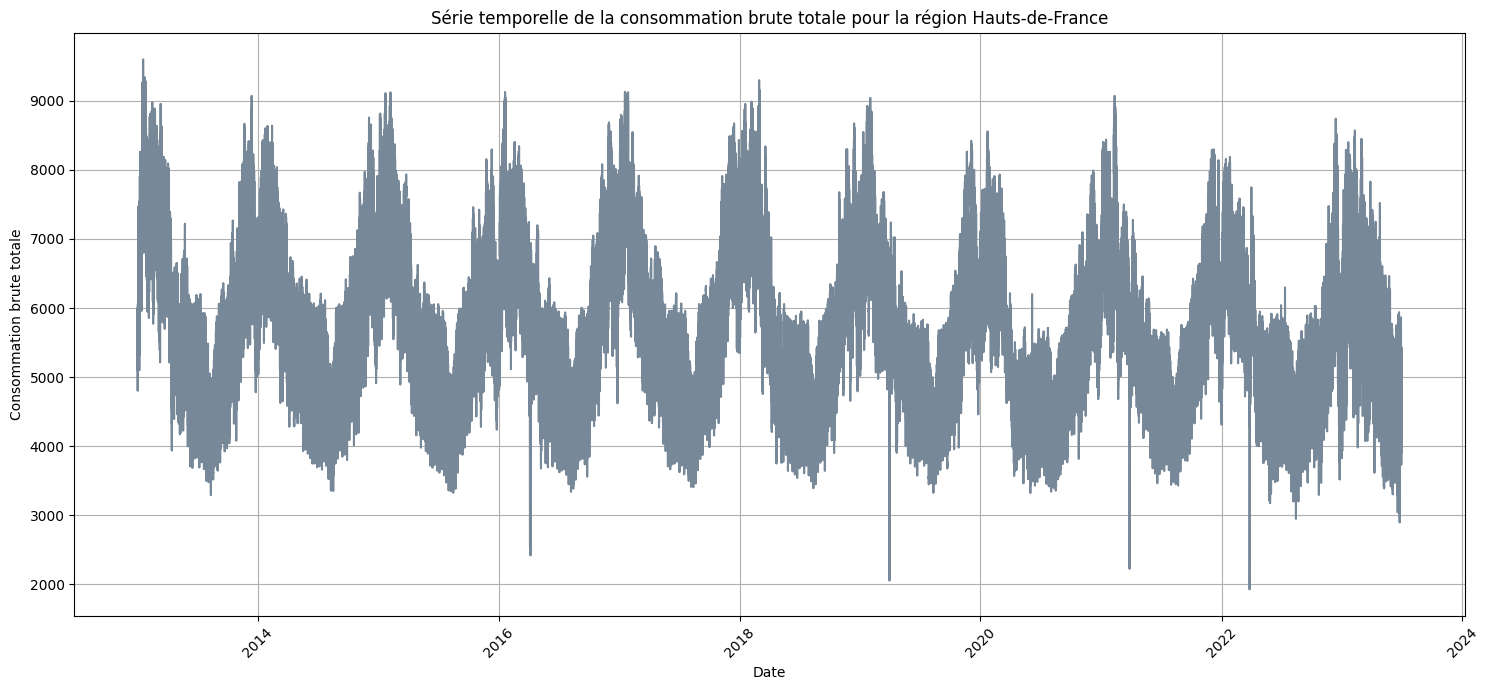

In [8]:
df['date_heure'] = pd.to_datetime(df['date_heure'], utc=True)
df_hauts_de_france = df[df['region'] == 'Hauts-de-France']

# Rééchantillonner les données par jour (si nécessaire)

df_hauts_de_france = df_hauts_de_france.set_index('date_heure')

df_hauts_de_france_daily =df_hauts_de_france.sort_index()



plt.figure(figsize=(15, 7))
plt.plot(df_hauts_de_france_daily.index, df_hauts_de_france_daily['consommation_brute_electricite_rte'], label='Consommation brute totale (moyenne quotidienne)', color='lightslategray')
plt.xlabel('Date')
plt.ylabel('Consommation brute totale')
plt.title('Série temporelle de la consommation brute totale pour la région Hauts-de-France')
plt.grid(True)
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()

# question 2

# par jour

/tmp/ipykernel_10763/2780293614.py:8: FutureWarning: The default value of numeric_only in DataFrameGroupBy.mean is deprecated. In a future version, numeric_only will default to False. Either specify numeric_only or select only columns which should be valid for the function.
  df_hauts_de_france_daily = df_hauts_de_france.resample('D').mean()


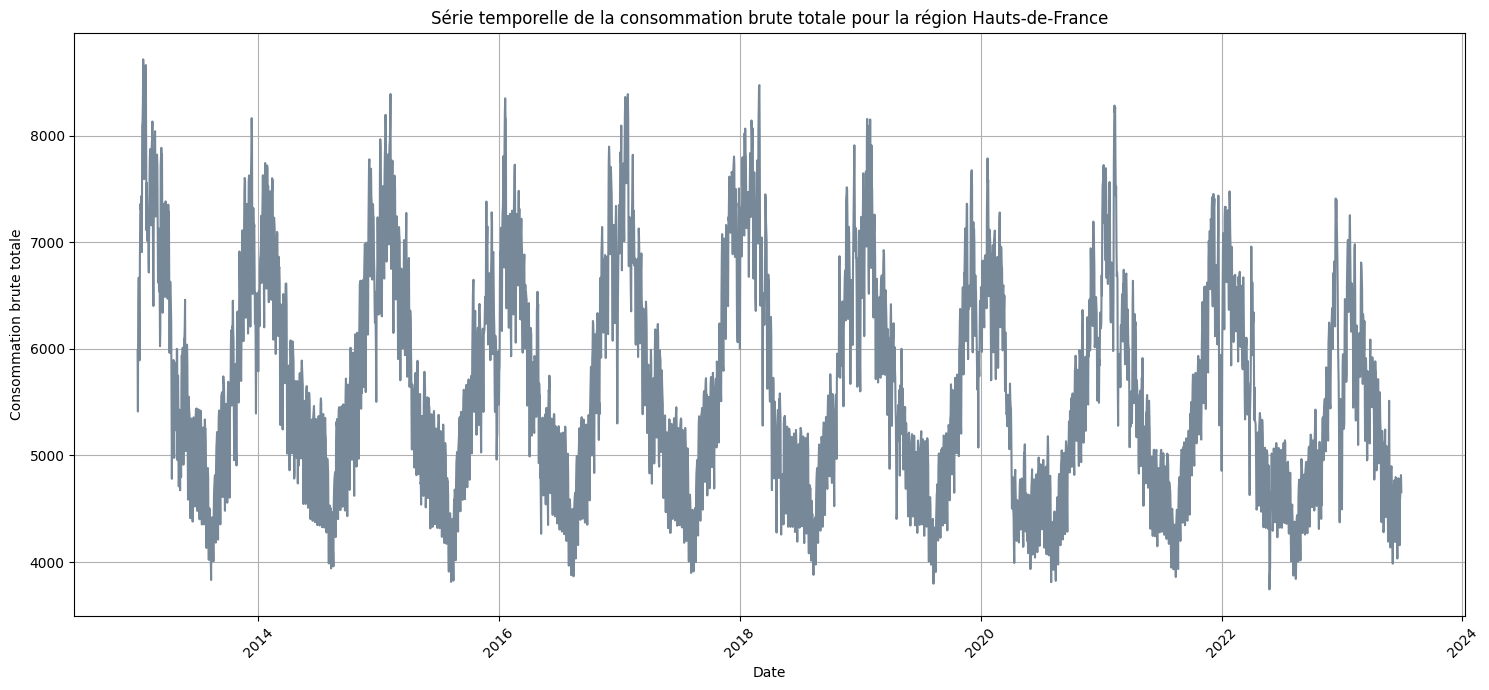

In [9]:
df['date_heure'] = pd.to_datetime(df['date_heure'], utc=True)
df_hauts_de_france = df[df['region'] == 'Hauts-de-France']

# Rééchantillonner les données par jour (si nécessaire)

df_hauts_de_france = df_hauts_de_france.set_index('date_heure')

df_hauts_de_france_daily = df_hauts_de_france.resample('D').mean()



plt.figure(figsize=(15, 7))
plt.plot(df_hauts_de_france_daily.index, df_hauts_de_france_daily['consommation_brute_electricite_rte'], label='Consommation brute totale (moyenne quotidienne)', color='lightslategray')
plt.xlabel('Date')
plt.ylabel('Consommation brute totale')
plt.title('Série temporelle de la consommation brute totale pour la région Hauts-de-France')
plt.grid(True)
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()

# par semaine

/tmp/ipykernel_10763/1022406416.py:8: FutureWarning: The default value of numeric_only in DataFrameGroupBy.mean is deprecated. In a future version, numeric_only will default to False. Either specify numeric_only or select only columns which should be valid for the function.
  df_hauts_de_france_daily = df_hauts_de_france.resample('W').mean()


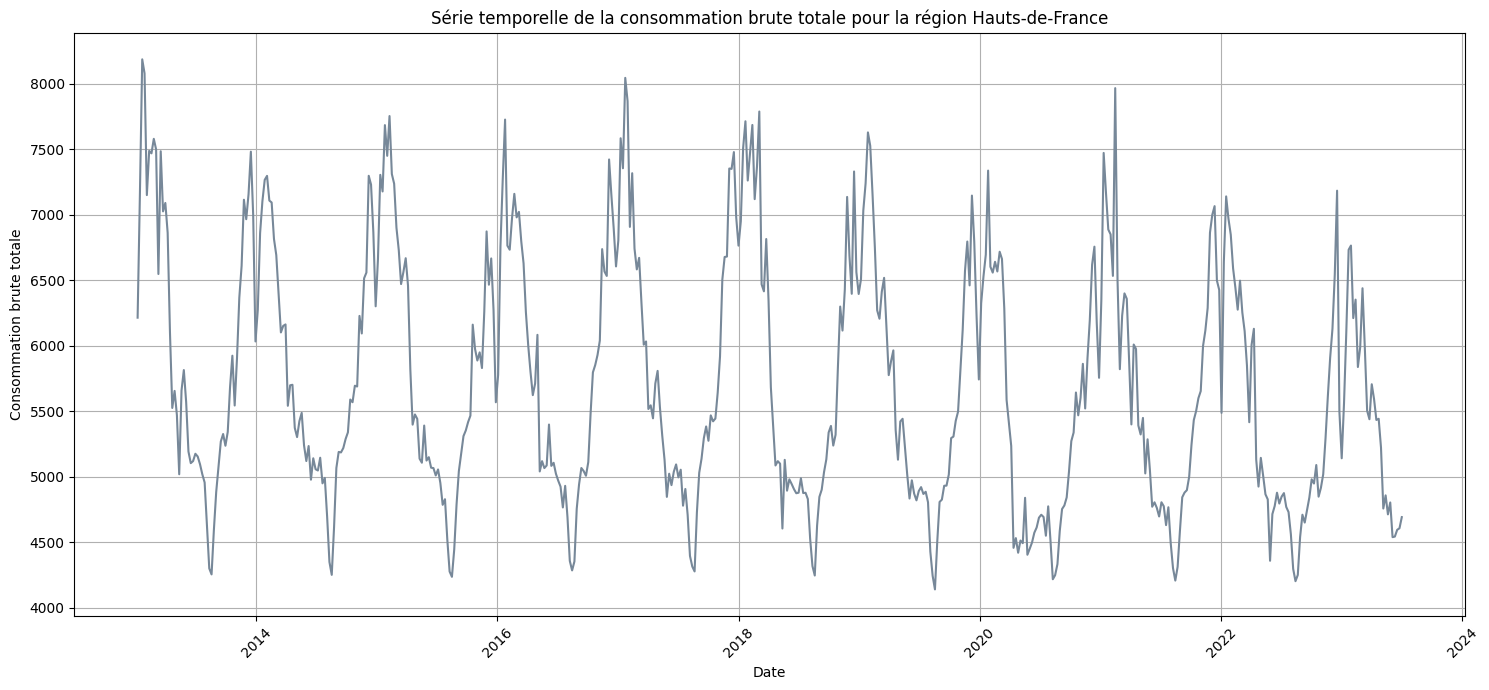

In [10]:
df['date_heure'] = pd.to_datetime(df['date_heure'], utc=True)
df_hauts_de_france = df[df['region'] == 'Hauts-de-France']

# Rééchantillonner les données par jour (si nécessaire)

df_hauts_de_france = df_hauts_de_france.set_index('date_heure')

df_hauts_de_france_daily = df_hauts_de_france.resample('W').mean()



plt.figure(figsize=(15, 7))
plt.plot(df_hauts_de_france_daily.index, df_hauts_de_france_daily['consommation_brute_electricite_rte'], label='Consommation brute totale (moyenne quotidienne)', color='lightslategray')
plt.xlabel('Date')
plt.ylabel('Consommation brute totale')
plt.title('Série temporelle de la consommation brute totale pour la région Hauts-de-France')
plt.grid(True)
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()

# par mois 

In [ ]:
df['date_heure'] = pd.to_datetime(df['date_heure'], utc=True)
df_hauts_de_france = df[df['region'] == 'Hauts-de-France']

# Rééchantillonner les données par jour (si nécessaire)

df_hauts_de_france = df_hauts_de_france.set_index('date_heure')

df_hauts_de_france_daily = df_hauts_de_france.resample('W').mean()



plt.figure(figsize=(15, 7))
plt.plot(df_hauts_de_france_daily.index, df_hauts_de_france_daily['consommation_brute_electricite_rte'], label='Consommation brute totale (moyenne quotidienne)', color='lightslategray')
plt.xlabel('Date')
plt.ylabel('Consommation brute totale')
plt.title('Série temporelle de la consommation brute totale pour la région Hauts-de-France')
plt.grid(True)
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()

# par trimestre

/tmp/ipykernel_10763/1259425539.py:8: FutureWarning: The default value of numeric_only in DataFrameGroupBy.mean is deprecated. In a future version, numeric_only will default to False. Either specify numeric_only or select only columns which should be valid for the function.
  df_hauts_de_france_daily = df_hauts_de_france.resample('Q').mean()


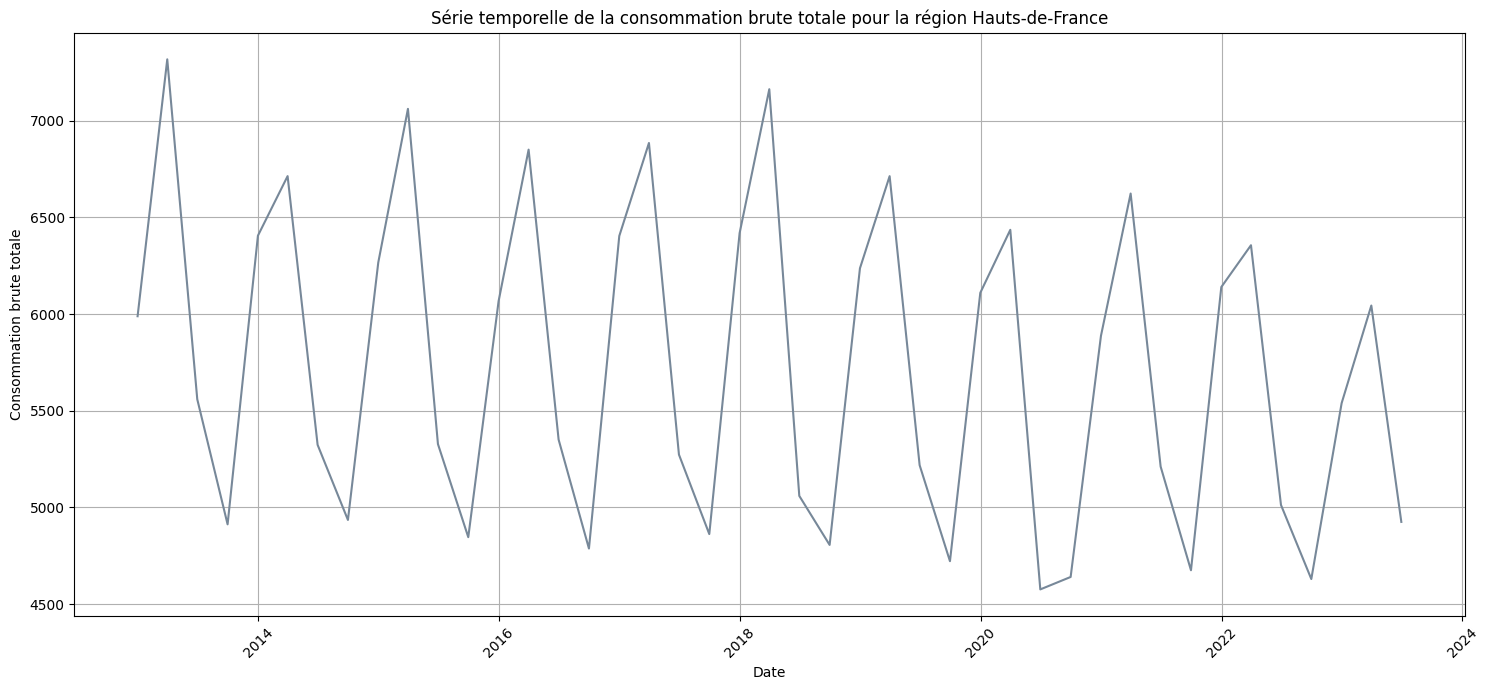

In [11]:
df['date_heure'] = pd.to_datetime(df['date_heure'], utc=True)
df_hauts_de_france = df[df['region'] == 'Hauts-de-France']

# Rééchantillonner les données par jour (si nécessaire)

df_hauts_de_france = df_hauts_de_france.set_index('date_heure')

df_hauts_de_france_daily = df_hauts_de_france.resample('Q').mean()



plt.figure(figsize=(15, 7))
plt.plot(df_hauts_de_france_daily.index, df_hauts_de_france_daily['consommation_brute_electricite_rte'], label='Consommation brute totale (moyenne quotidienne)', color='lightslategray')
plt.xlabel('Date')
plt.ylabel('Consommation brute totale')
plt.title('Série temporelle de la consommation brute totale pour la région Hauts-de-France')
plt.grid(True)
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()

# par an 

In [ ]:
df['date_heure'] = pd.to_datetime(df['date_heure'], utc=True)
df_hauts_de_france = df[df['region'] == 'Hauts-de-France']

# Rééchantillonner les données par jour (si nécessaire)

df_hauts_de_france = df_hauts_de_france.set_index('date_heure')

df_hauts_de_france_daily = df_hauts_de_france.resample('Q').mean()



plt.figure(figsize=(15, 7))
plt.plot(df_hauts_de_france_daily.index, df_hauts_de_france_daily['consommation_brute_electricite_rte'], label='Consommation brute totale (moyenne quotidienne)', color='lightslategray')
plt.xlabel('Date')
plt.ylabel('Consommation brute totale')
plt.title('Série temporelle de la consommation brute totale pour la région Hauts-de-France')
plt.grid(True)
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()

# question 3  : moyenne mobile centrée

/tmp/ipykernel_10763/4200949218.py:10: FutureWarning: The default value of numeric_only in DataFrameGroupBy.mean is deprecated. In a future version, numeric_only will default to False. Either specify numeric_only or select only columns which should be valid for the function.
  df_hauts_de_france_daily = df_hauts_de_france.resample('D').mean()


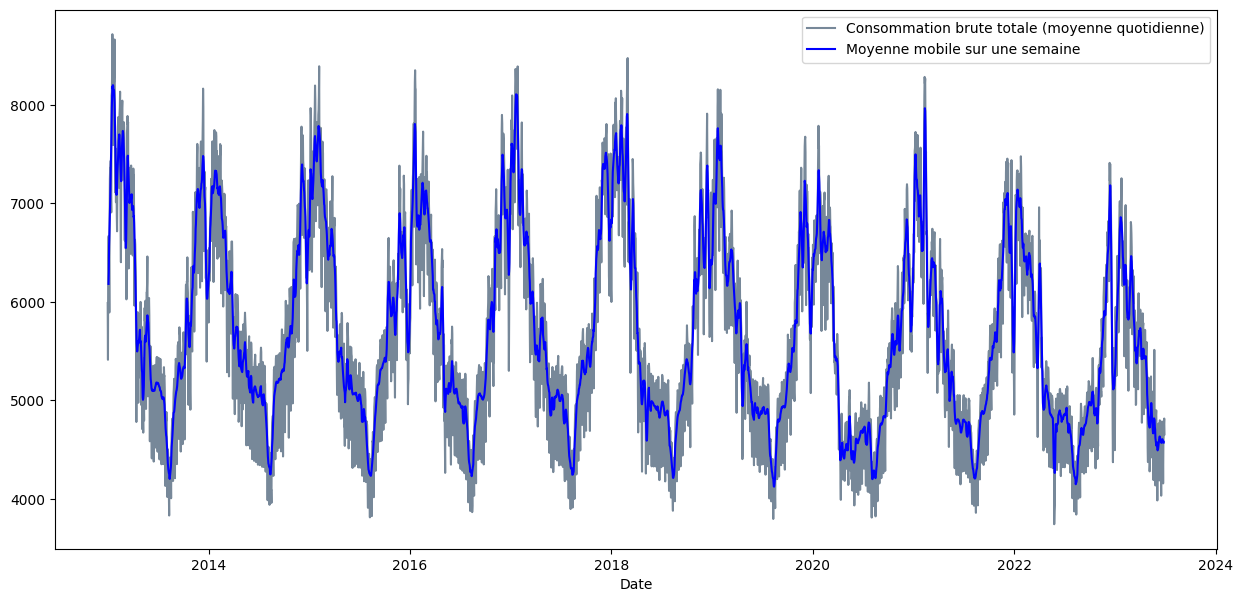

In [12]:
import pandas as pd
import matplotlib.pyplot as plt

# Supposons que vous ayez déjà créé votre DataFrame df et converti 'date_heure' en datetime comme précédemment.

df_hauts_de_france = df[df['region'] == 'Hauts-de-France']

# Rééchantillonner les données par jour si ce n'est pas déjà fait
df_hauts_de_france = df_hauts_de_france.set_index('date_heure')
df_hauts_de_france_daily = df_hauts_de_france.resample('D').mean()

# Calculer la moyenne mobile sur une semaine centrée et symétrique
rolling_weekly_mean = df_hauts_de_france_daily['consommation_brute_electricite_rte'].rolling(window=7, center=True).mean()

# Créer un graphique
plt.figure(figsize=(15, 7))
plt.plot(df_hauts_de_france_daily.index, df_hauts_de_france_daily['consommation_brute_electricite_rte'], label='Consommation brute totale (moyenne quotidienne)', color='lightslategray')
plt.plot(df_hauts_de_france_daily.index, rolling_weekly_mean, label='Moyenne mobile sur une semaine', color='blue')
plt.xlabel('Date')
plt.legend()
plt.show()


# question 4

# la moyenne mobile va prendre à partir d'une date les données des 3 jours précédents, le jour en cours et les 3 jours suivants
# auparavant on regroupait les valeurs à des dates ou des saisonalités fixes mais pas autour de ces saisonalités


In [13]:
import pandas as pd
import matplotlib.pyplot as plt

# Supposons que vous ayez déjà créé votre DataFrame df et converti 'date_heure' en datetime comme précédemment.

# Rééchantillonner les données par trimestre
df_quarterly = df.resample('Q').mean()

# Rééchantillonner les données par mois
df_monthly = df.resample('M').mean()

# Rééchantillonner les données par jour de la semaine (hebdomadaire)
df_weekly = df.resample('W').mean()

# Rééchantillonner les données par heure
df_hourly = df.resample('H').mean()

# Créer des sous-plots pour chaque saisonnalité
fig, axes = plt.subplots(nrows=4, ncols=1, figsize=(15, 20))

# Box-plot trimestriel
df_quarterly.boxplot(column='consommation_brute_electricite_rte', ax=axes[0])
axes[0].set_title('Saisonnalité Trimestrielle')

# Box-plot mensuel
df_monthly.boxplot(column='consommation_brute_electricite_rte', ax=axes[1])
axes[1].set_title('Saisonnalité Mensuelle')

# Box-plot hebdomadaire
df_weekly.boxplot(column='consommation_brute_electricite_rte', ax=axes[2])
axes[2].set_title('Saisonnalité Hebdomadaire')

# Box-plot journalier
df_hourly.boxplot(column='consommation_brute_electricite_rte', ax=axes[3])
axes[3].set_title('Saisonnalité Journalière')

# Ajuster l'espacement entre les sous-plots
plt.tight_layout()

# Afficher les graphiques
plt.show()


TypeError: Only valid with DatetimeIndex, TimedeltaIndex or PeriodIndex, but got an instance of 'RangeIndex'

# question 5

In [6]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
import seaborn as sns

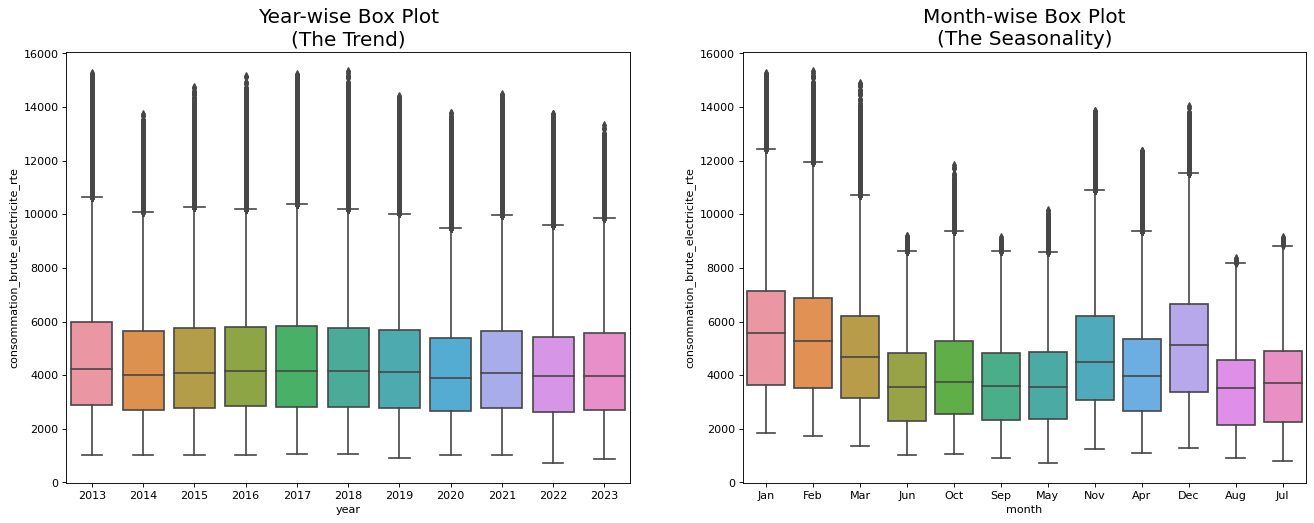

In [12]:
df = pd.read_csv('energie.csv', sep=";",parse_dates=['date'], index_col='date')
df.reset_index(inplace=True)

# Prepare data
df['year'] = [d.year for d in df.date]
df['month'] = [d.strftime('%b') for d in df.date]
years = df['year'].unique()

# Draw Plot
fig, axes = plt.subplots(1, 2, figsize=(20,7), dpi= 80)
sns.boxplot(x='year', y='consommation_brute_electricite_rte', data=df, ax=axes[0])
sns.boxplot(x='month', y='consommation_brute_electricite_rte', data=df.loc[~df.year.isin([2000, 2023]), :])

# Set Title
axes[0].set_title('Year-wise Box Plot\n(The Trend)', fontsize=18); 
axes[1].set_title('Month-wise Box Plot\n(The Seasonality)', fontsize=18)
plt.show()

In [5]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
import seaborn as sns

In [ ]:
df=pd.read_csv('energie.csv', sep=";")

In [4]:
df = pd.read_csv('energie.csv', sep=";", parse_dates=['date_heure'])
x = df['date'].values
y1 = df['consommation_brute_electricite_rte'].values

# Plot
fig, ax = plt.subplots(1, 1, figsize=(16,5), dpi= 120)
plt.fill_between(x, y1=y1, y2=-y1, alpha=0.5, linewidth=2, color='seagreen')
plt.ylim(-3000, 3000)
plt.title('Air Passengers (Two Side View)', fontsize=16)
plt.hlines(y=0, xmin=np.min(df.date), xmax=np.max(df.date), linewidth=.5)
plt.show()

OverflowError: In draw_path_collection: Exceeded cell block limit

<Figure size 1920x600 with 1 Axes>

In [32]:
import pandas as pd
import matplotlib.pyplot as plt
df=pd.read_csv("energie.csv", sep=";", parse_dates = True)

In [20]:
df['date_heure'] = pd.to_datetime(df['date_heure'], utc=True)
df.set_index('date_heure', inplace=True)


/tmp/ipykernel_10763/3384127768.py:12: FutureWarning: The default value of numeric_only in DataFrameGroupBy.mean is deprecated. In a future version, numeric_only will default to False. Either specify numeric_only or select only columns which should be valid for the function.
  df_quarterly = df.resample('Q').mean()
/tmp/ipykernel_10763/3384127768.py:15: FutureWarning: The default value of numeric_only in DataFrameGroupBy.mean is deprecated. In a future version, numeric_only will default to False. Either specify numeric_only or select only columns which should be valid for the function.
  df_monthly = df.resample('M').mean()
/tmp/ipykernel_10763/3384127768.py:18: FutureWarning: The default value of numeric_only in DataFrameGroupBy.mean is deprecated. In a future version, numeric_only will default to False. Either specify numeric_only or select only columns which should be valid for the function.
  df_annually = df.resample('Y').mean()


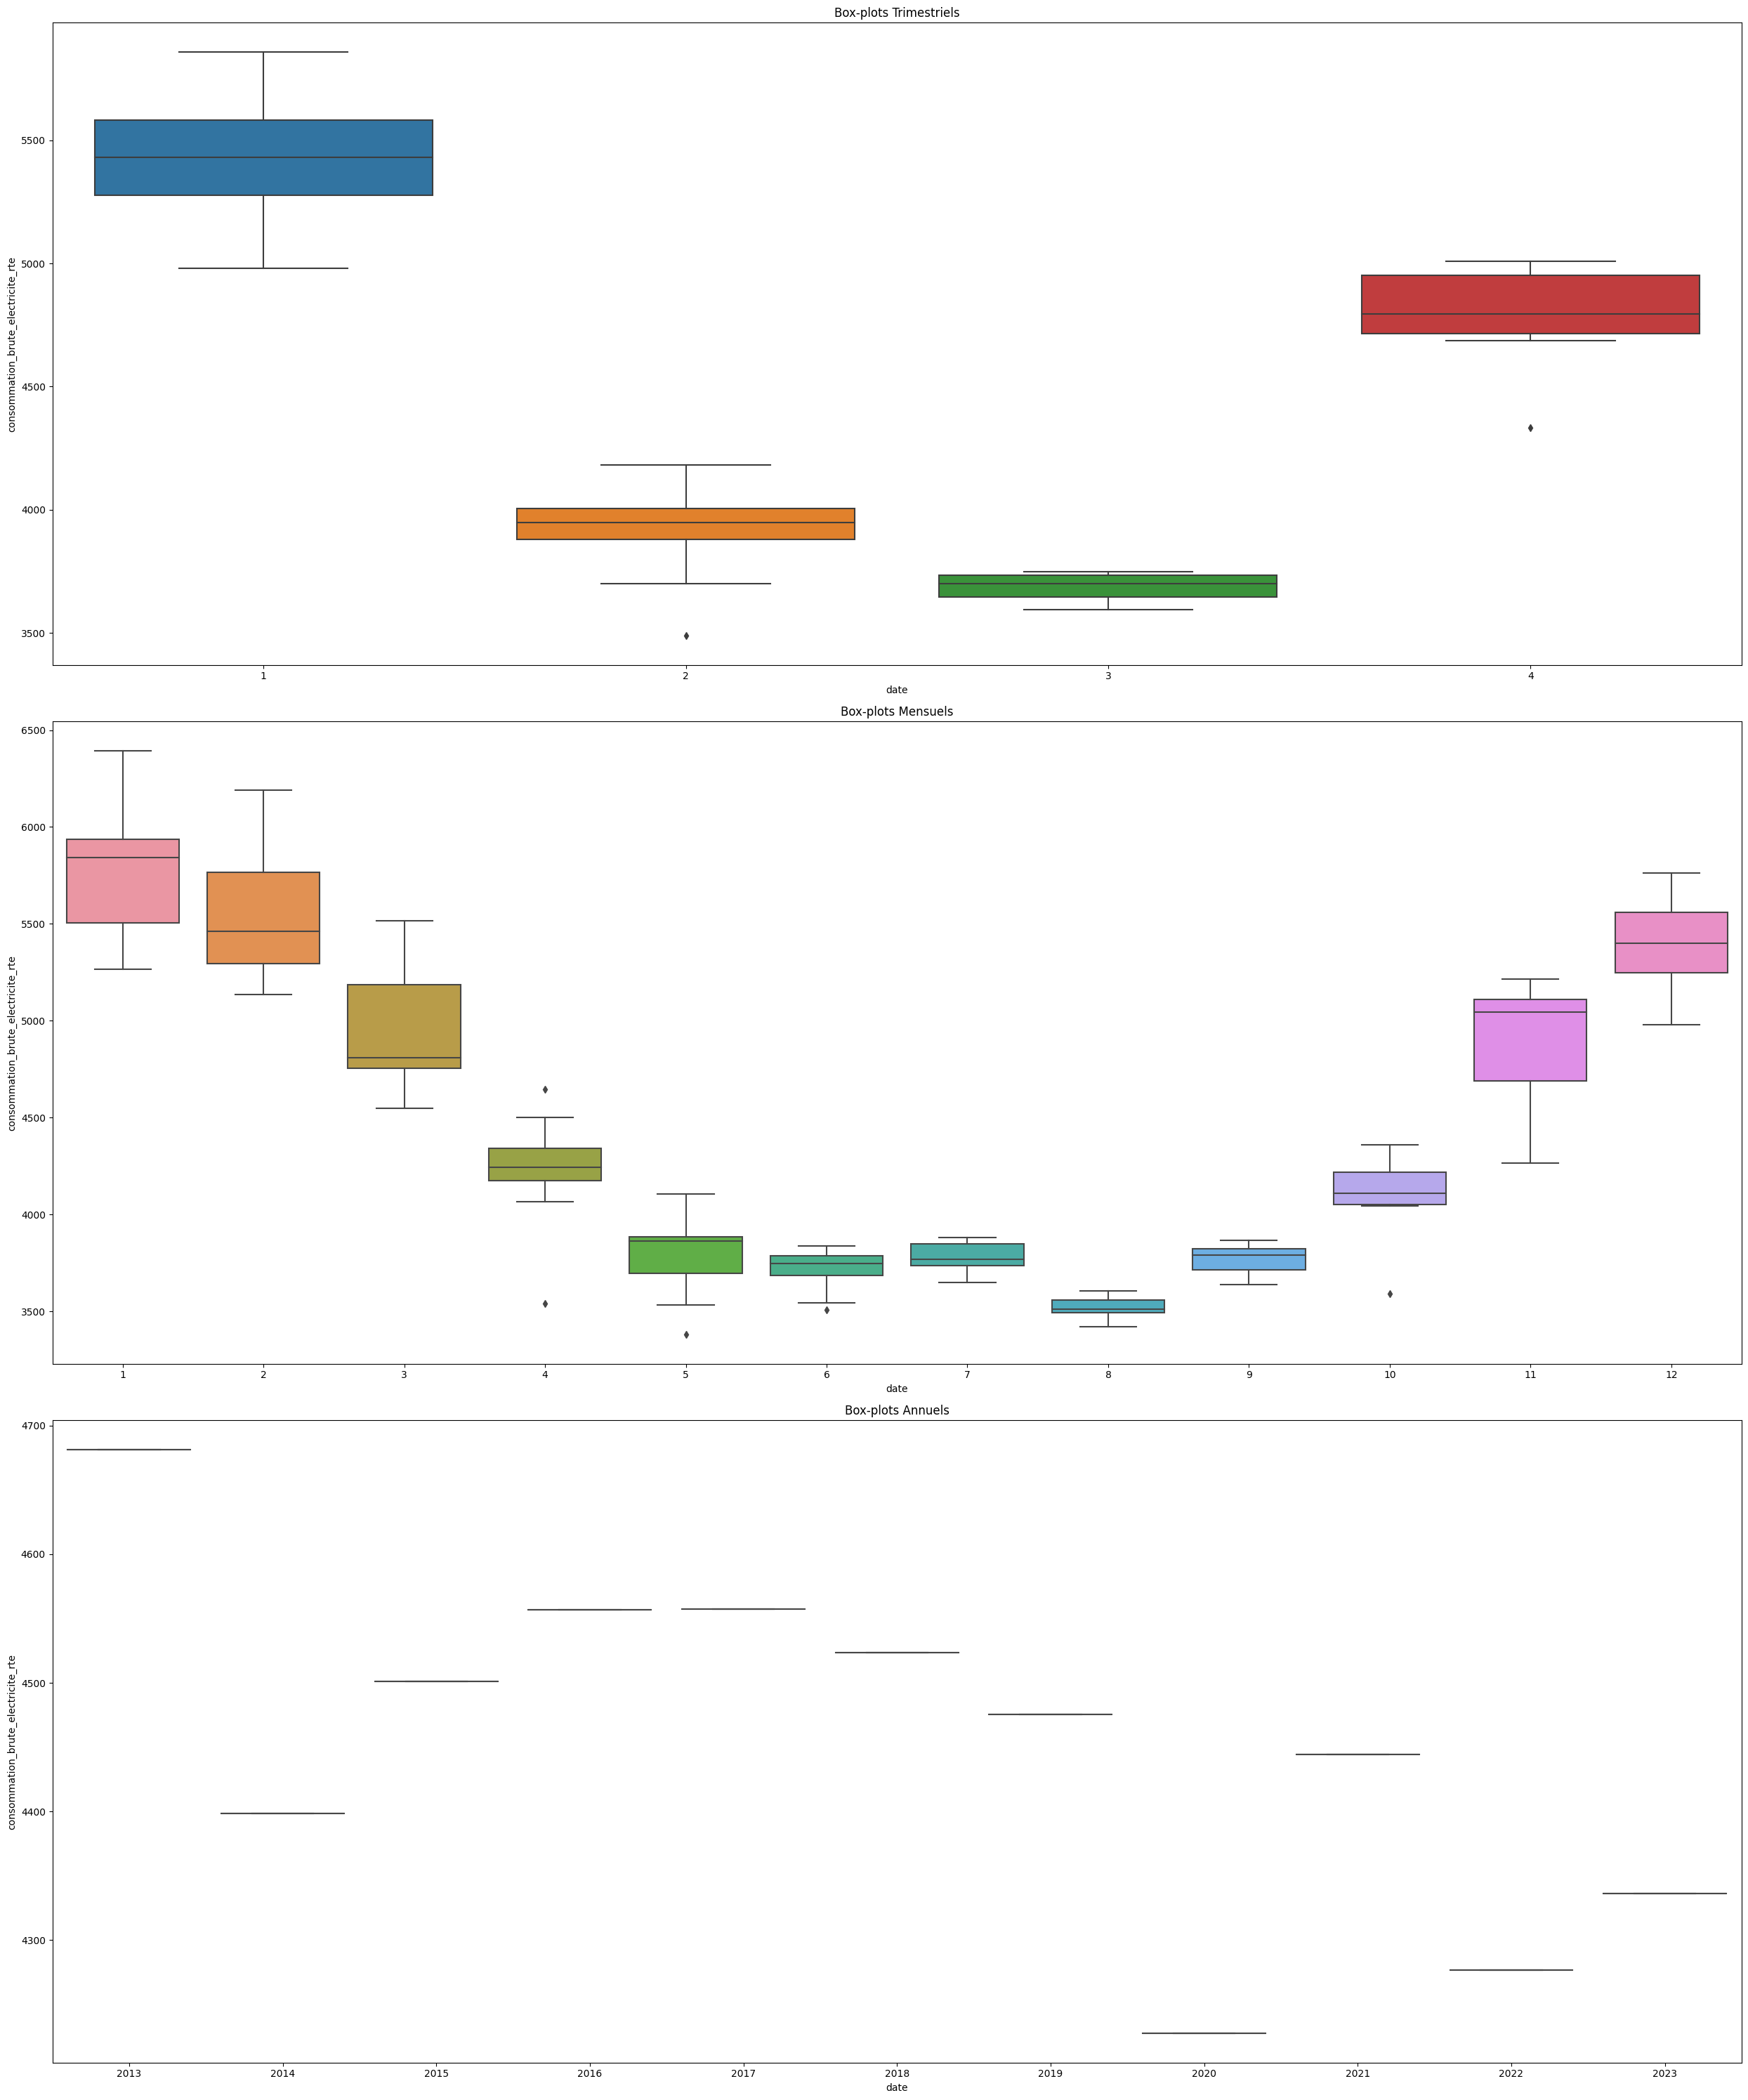

In [30]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

# Supposons que vous ayez déjà créé votre DataFrame df et converti 'date_heure' en datetime comme précédemment.

# Assurez-vous que le DataFrame a un index datetime
df['date'] = pd.to_datetime(df['date'], utc=True)
df.set_index('date', inplace=True)

# Rééchantillonnez les données par trimestre
df_quarterly = df.resample('Q').mean()

# Rééchantillonnez les données par mois
df_monthly = df.resample('M').mean()

# Rééchantillonnez les données par année
df_annually = df.resample('Y').mean()

# Créez un graphique avec plusieurs box-plots pour chaque période
plt.figure(figsize=(25, 30))

# Box-plots trimestriels
plt.subplot(3, 1, 1)
sns.boxplot(x=df_quarterly.index.quarter, y='consommation_brute_electricite_rte', data=df_quarterly)
plt.title('Box-plots Trimestriels')

# Box-plots mensuels
plt.subplot(3, 1, 2)
sns.boxplot(x=df_monthly.index.month, y='consommation_brute_electricite_rte', data=df_monthly)
plt.title('Box-plots Mensuels')

# Box-plots annuels
plt.subplot(3, 1, 3)
sns.boxplot(x=df_annually.index.year, y='consommation_brute_electricite_rte', data=df_annually)
plt.title('Box-plots Annuels')

# Ajustez l'espacement entre les sous-plots
plt.tight_layout()

# Afficher le graphique
plt.show()


/tmp/ipykernel_10763/1298762935.py:1: FutureWarning: The default value of numeric_only in DataFrameGroupBy.mean is deprecated. In a future version, numeric_only will default to False. Either specify numeric_only or select only columns which should be valid for the function.
  df_annually = df.resample('Y').mean()


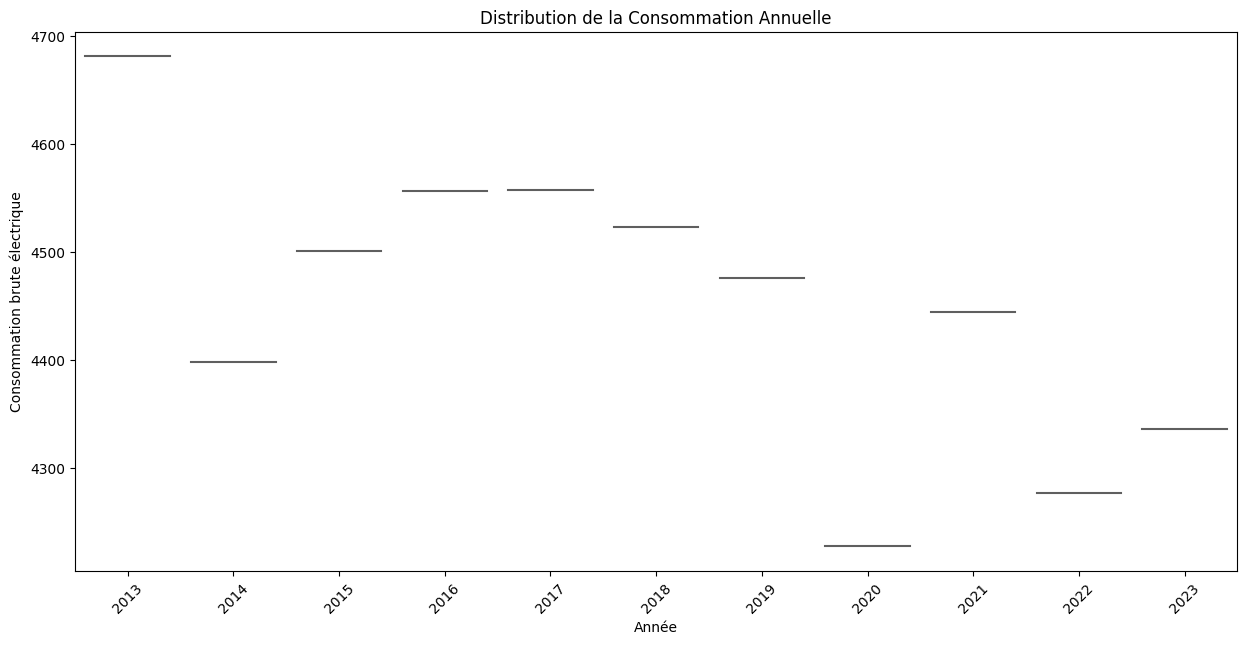

In [31]:
df_annually = df.resample('Y').mean()

# Créez un graphique avec des box-plots et des violons superposés pour chaque année
plt.figure(figsize=(15, 7))
sns.violinplot(x=df_annually.index.year, y='consommation_brute_electricite_rte', data=df_annually, inner='box', palette='Set3')
plt.title('Distribution de la Consommation Annuelle')
plt.xlabel('Année')
plt.ylabel('Consommation brute électrique')
plt.xticks(rotation=45)

# Afficher le graphique
plt.show()

# 6 quoi la stationnarité?

# la stationarité va se baser sur la moyenne et la variance et désigne le fait que des observations de données vont prendre en compte la moyenne et variance constants au cours d'une période de temps

# 7 visuellement la time série est non stationnaire

In [ ]:
# 8 

In [33]:
import pandas as pd
from statsmodels.tsa.stattools import adfuller

# Supposons que vous ayez déjà créé votre DataFrame df et converti 'date_heure' en datetime comme précédemment.

# Assurez-vous que le DataFrame a un index datetime
df['date'] = pd.to_datetime(df['date'], utc=True)
df.set_index('date', inplace=True)

# Sélectionnez la colonne de consommation brute d'électricité pour le test
data = df['consommation_brute_electricite_rte']

# Effectuez le test de Dickey-Fuller
result = adfuller(data)

# Affichez le résultat du test
print("Statistique de test DF :", result[0])
print("Valeur critique à 1% :", result[4]['1%'])
print("Valeur critique à 5% :", result[4]['5%'])
print("Valeur critique à 10% :", result[4]['10%'])
print("P-value :", result[1])

# Interprétez les résultats
if result[1] < 0.05:
    print("La série est stationnaire (rejeter l'hypothèse nulle)")
else:
    print("La série n'est pas stationnaire (ne pas rejeter l'hypothèse nulle)")


: 

: 

# 8/ Dickey fuller test: pour voir si une série est stationnaire ou non 

In [ ]:
Unit Root Test : pr tester stationarité d'une time series

In [2]:
import pandas as pd
import matplotlib.pyplot as plt
df=pd.read_csv("energie.csv", sep=";", parse_dates = True)

In [3]:
import pandas as pd
from statsmodels.tsa.stattools import adfuller


# Assurez-vous que votre DataFrame a un index datetime (comme vous l'avez mentionné précédemment)
df['date'] = pd.to_datetime(df['date'], utc=True)
df.set_index('date', inplace=True)

# Sélectionnez la colonne de valeurs que vous souhaitez tester (remplacez 'valeurs' par le nom de votre colonne)
serie_temporelle = df['consommation_brute_electricite_rte']

# Effectuez le test ADF
result = adfuller(serie_temporelle)

# Récupérez les résultats du test
p_value = result[1]
test_statistic = result[0]
num_lags = result[2]
critical_values = result[4]

# Affichez les résultats
print("Résultats du test ADF:")
print(f"P-value : {p_value}")
print(f"Statistique de test : {test_statistic}")
print(f"Nombre de retards considérés pour le test : {num_lags}")
print("Valeurs critiques :")
for key, value in critical_values.items():
    print(f"   {key}: {value}")

: 

: 

In [ ]:
plus petit que valeur critique: c'est stationnaire

# questions aprés veille

# 1/.Sachant que les modèles ARIMA et SARIMA sont des régression linéaires qui prennent comme variables explicatives les “lags” (les états précédents) de notre time série. Pourquoi est-on si attaché au fait que notre série temporelle soit stationnaire?

afin que les observations ne soient pas influencés par une non stationarité

# 2/. Qu’est qu’un modèle AR, à quoi correspond le paramètre p ?


### 2 c'est un modéle qui modélise une variable chronologique en fonction de ses propres valeurs passées, au lieu de variables indépendantes externes.
### 2 le paramétre p : Combien d’observations temporelles précédentes à T0 je dois inclure pour que la composante autorégressive de mon modéle fonctionne.

# 3/. Qu’est ce qu’un modèle MA, à quoi correspond le paramètre q?

### l’utilité de la moyenne mobile est la réduction du bruit en rapport à la saisonnalité. De cette façon on va définir l’environnement pour le calcul des points x de la série temporelle en fonction de la saisonalité observée de celle-ci
### q: :q représente le nombre d’observations temporelles à inclure dans le modèle pour la composante de moyenne mobile

# 4/. Qu’est ce que le modèle ARIMA et à quoi correspond le paramètre d?

### Le modèle Arima va se baser sur les mêmes concepts qu’Arma, à savoir l’autorégression et la moyenne mobile, mais va s’adapter à des séries temporelles non-stationnaires.
### le d est : C’est le nombre de différenciation que je vais exécuter, le nombre de niveau de différenciation. On va pouvoir le définir par rapport à la forme de la courbe de notre série temporelle(linéaire, parabolique etc).

# 5/. Qu’est ce que le modèle SARIMA et à quoi correspond le paramètre s?

### sarima : 	Sarima va se baser sur le modèle Arima en incorporant en plus de passer outre la saisonalité des saisons.
### La moyenne mobile va nous permettre de parer à la saisonalité, mais si la saisonalité est complexe ou varie d’une année sur l’autre, la prise en compte de la saisonalité par le modèle Sarima sera nécessaire, il apportera une prise en compte robuste de la saisonnalité.

# 6/. Déterminer les paramètres s, d, q, p  à l’aide des graphiques d’autocorrélation et d’autocorrélation partielle, ainsi qu’à l’aide des graphiques de la première partie.
Déterminer d’abord s et appliquer la désaisonnalisation
Sur la série désaisonnalisée recherchez d et détrendez
Sur la série détrendée, recherchez q et p


In [8]:
df=pd.read_csv('vrmt_ok.csv')

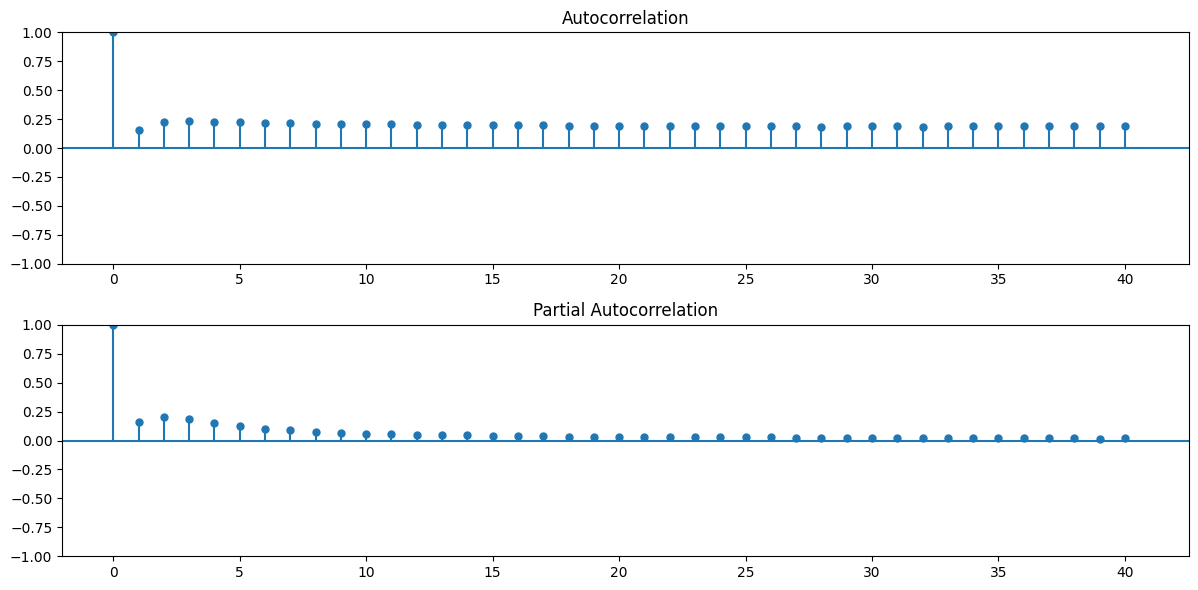

In [10]:
import pandas as pd
import matplotlib.pyplot as plt
from statsmodels.graphics.tsaplots import plot_acf, plot_pacf


data = df["consommation_brute_electricite_rte"]


plt.figure(figsize=(12, 6))

# Plot ACF
plt.subplot(211)
plot_acf(data, lags=40, ax=plt.gca())

# Plot PACF
plt.subplot(212)
plot_pacf(data, lags=40, ax=plt.gca())

plt.tight_layout()
plt.show()


<Figure size 1200x600 with 0 Axes>

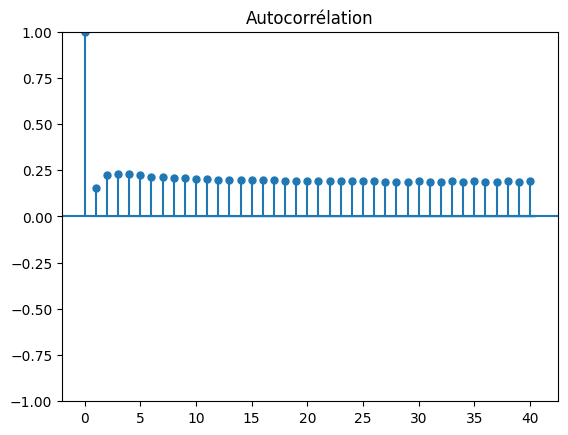

<Figure size 1200x600 with 0 Axes>

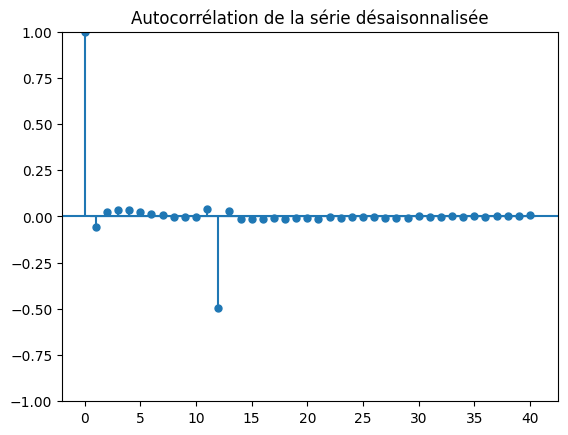

<Figure size 1200x600 with 0 Axes>

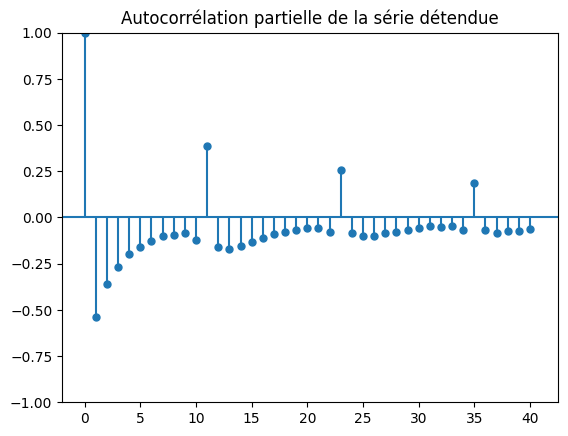

RUNNING THE L-BFGS-B CODE

           * * *

Machine precision = 2.220D-16
 N =            6     M =           10

At X0         0 variables are exactly at the bounds

At iterate    0    f=  8.47940D+00    |proj g|=  4.49099D-02


 This problem is unconstrained.



At iterate    5    f=  8.44247D+00    |proj g|=  3.68177D-03

At iterate   10    f=  8.43716D+00    |proj g|=  5.76998D-04

At iterate   15    f=  8.42888D+00    |proj g|=  3.46332D-02
  ys=-4.555E+04  -gs= 4.511E-02 BFGS update SKIPPED


LinAlgError: LU decomposition error.

In [12]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from statsmodels.graphics.tsaplots import plot_acf, plot_pacf
from statsmodels.tsa.statespace.sarimax import SARIMAX

# Charger votre série temporelle
# Exemple : df est votre DataFrame avec la série temporelle
# Remarque : Assurez-vous que votre série temporelle est correctement indexée par la date
# Si ce n'est pas le cas, vous pouvez utiliser df.set_index('date', inplace=True) pour l'indexer.

# Étape 1 : Déterminer s (période saisonnière)
# Calculer l'ACF de votre série temporelle pour trouver la période saisonnière s
plt.figure(figsize=(12, 6))
plot_acf(df['consommation_brute_electricite_rte'], lags=40)
plt.title('Autocorrélation')
plt.show()

# Étape 2 : Appliquer la désaisonnalisation
# Définir s en fonction de vos résultats (par exemple, s=12 pour des données mensuelles)
s = 12
df['saisonnalite'] = df['consommation_brute_electricite_rte'] - df['consommation_brute_electricite_rte'].shift(s)

# Étape 3 : Recherchez d (ordre de différenciation non saisonnière)
# Calculer l'ACF de la série désaisonnalisée pour déterminer d
plt.figure(figsize=(12, 6))
plot_acf(df['saisonnalite'].dropna(), lags=40)
plt.title('Autocorrélation de la série désaisonnalisée')
plt.show()

# Étape 4 : Détendez la série
d = 1
df['detrend'] = df['saisonnalite'] - df['saisonnalite'].shift(d)

# Étape 5 : Recherchez q (ordre de la moyenne mobile non saisonnière) et p (ordre de l'autorégression non saisonnière)
# Calculer la PACF et mettre en évidence la zone bleutée
plt.figure(figsize=(12, 6))
plot_pacf(df['detrend'].dropna(), lags=40, alpha=0.05)  # Alpha contrôle la transparence de la zone bleutée
plt.title('Autocorrélation partielle de la série détendue')
plt.show()

# Étape 6 : Ajustez le modèle SARIMA
q = 2  # Remplacez par la valeur appropriée pour q
p = 2  # Remplacez par la valeur appropriée pour p

model = SARIMAX(df['consommation_brute_electricite_rte'], order=(p, d, q), seasonal_order=(0, 1, 1, s))
results = model.fit()

# Étape 7 : Évaluation et ajustement
# Évaluez la performance de votre modèle, ajustez les paramètres si nécessaire
print(results.summary())

# Affichez les résidus du modèle
plt.figure(figsize=(12, 6))
plt.plot(results.resid)
plt.title('Résidus du modèle SARIMA')
plt.show()



# réponse question 6

In [47]:
df=pd.read_csv('vrmt_ok.csv')

In [48]:
import pandas as pd

df = pd.read_csv("vrmt_ok.csv", index_col="date", parse_dates = True)


df.index = pd.to_datetime(df.index, utc=True)
# df.to_csv('df1.csv')
# df=pd.read_csv('df1.csv')

/home/apprenant/miniconda3/envs/scrappy/lib/python3.11/site-packages/matplotlib/axes/_base.py:2503: UserWarning: Warning: converting a masked element to nan.
  xys = np.asarray(xys)
/tmp/ipykernel_110971/3214694627.py:25: UserWarning: Matplotlib is currently using module://matplotlib_inline.backend_inline, which is a non-GUI backend, so cannot show the figure.
  plot_pacf(df_rolling_mean,ax=axes[0, 2]).show()
/tmp/ipykernel_110971/3214694627.py:30: UserWarning: Matplotlib is currently using module://matplotlib_inline.backend_inline, which is a non-GUI backend, so cannot show the figure.
  plot_pacf(df_rolling_mean.diff().dropna(),ax=axes[1, 2]).show()
/tmp/ipykernel_110971/3214694627.py:35: UserWarning: Matplotlib is currently using module://matplotlib_inline.backend_inline, which is a non-GUI backend, so cannot show the figure.
  plot_pacf(df_rolling_mean.diff().diff().dropna(),ax=axes[2, 2]).show()


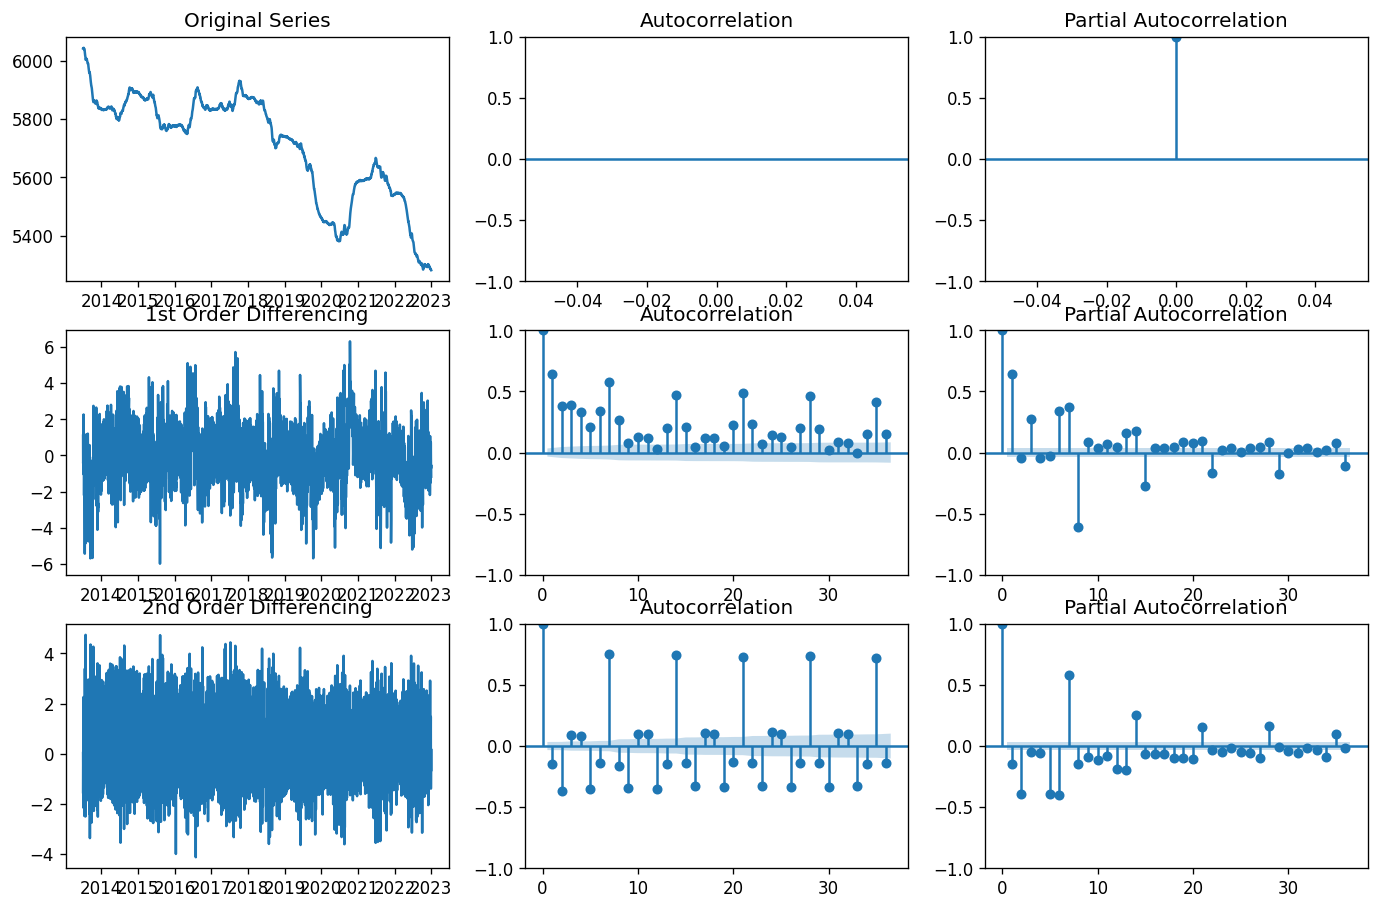

In [50]:



import numpy as np
from statsmodels.graphics.tsaplots import plot_pacf
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from statsmodels.graphics.tsaplots import plot_acf, plot_pacf
from statsmodels.tsa.statespace.sarimax import SARIMAX

plt.rcParams.update({'figure.figsize':(14,9), 'figure.dpi':120})

df_daily = df["consommation_brute_electricite_rte"].resample('D').mean()

# Créer une fenêtre de moyenne mobile sur 365 jours
# rolling_window = df_daily.rolling(window=365, center=True, min_periods=1, win_type=None)
rolling_window = df_daily.rolling(window=365, center=True, win_type=None)

# Calculer la moyenne mobile sur 365 jours
df_rolling_mean = rolling_window.mean()

# Original Series
fig, axes = plt.subplots(3, 3)
axes[0, 0].plot(df_rolling_mean); axes[0, 0].set_title('Original Series')
plot_acf(df_rolling_mean, ax=axes[0, 1])
plot_pacf(df_rolling_mean,ax=axes[0, 2]).show()

# 1st Differencing
axes[1, 0].plot(df_rolling_mean.diff()); axes[1, 0].set_title('1st Order Differencing')
plot_acf(df_rolling_mean.diff().dropna(), ax=axes[1, 1])
plot_pacf(df_rolling_mean.diff().dropna(),ax=axes[1, 2]).show()

# 2nd Differencing
axes[2, 0].plot(df_rolling_mean.diff().diff()); axes[2, 0].set_title('2nd Order Differencing')
plot_acf(df_rolling_mean.diff().diff().dropna(), ax=axes[2, 1])
plot_pacf(df_rolling_mean.diff().diff().dropna(),ax=axes[2, 2]).show()

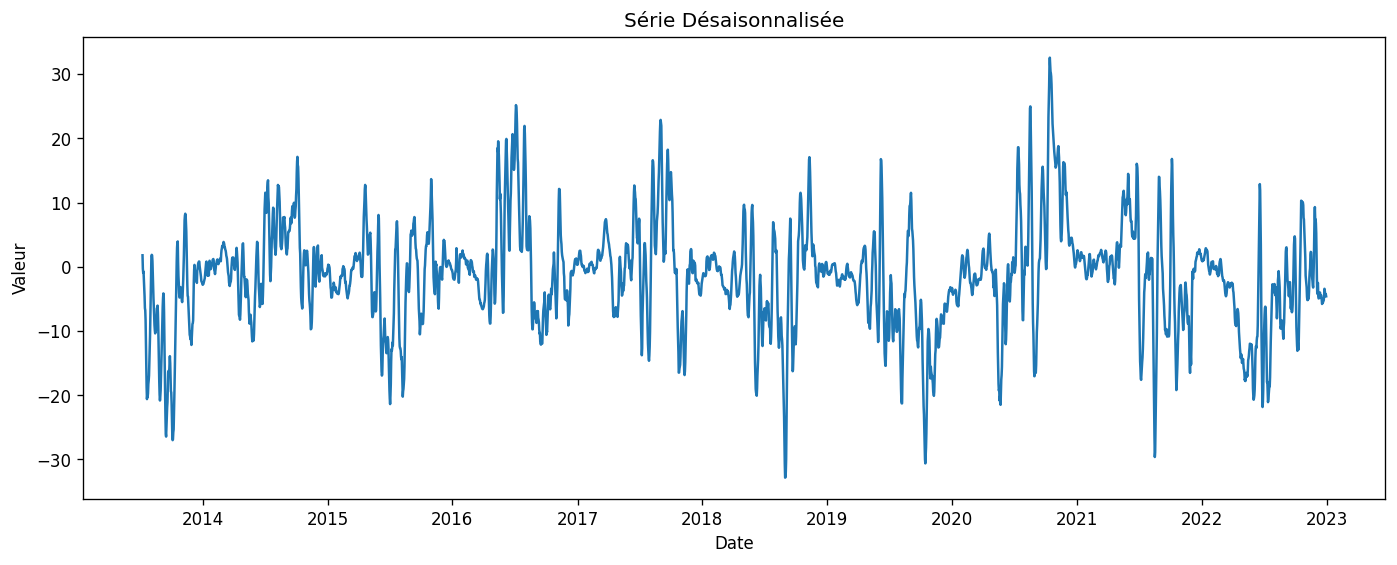

In [51]:
seasonal_period = 7  # Période saisonnière de 7 jours

# Calcul de la moyenne mobile saisonnière
df_seasonal_mean = df_rolling_mean - df_rolling_mean.shift(seasonal_period)

# Tracé de la série désaisonnalisée
plt.figure(figsize=(14, 5))
plt.plot(df_seasonal_mean)
plt.title('Série Désaisonnalisée')
plt.xlabel('Date')
plt.ylabel('Valeur')
plt.show()

In [49]:
# déterminer s,d q, p
# s:7
#d:2
#q:

SyntaxError: invalid syntax (4034713831.py, line 1)

In [53]:

df_diff1 = df_seasonal_mean.diff().dropna()

# Vérifier la stationnarité de la première différenciation
# Vous pouvez utiliser des tests statistiques ou des graphiques
# Par exemple, pour un test de stationnarité Augmented Dickey-Fuller (ADF) :
from statsmodels.tsa.stattools import adfuller
adf_test1 = adfuller(df_diff1)
print(f'ADF Statistic: {adf_test1[0]}')
print(f'p-value: {adf_test1[1]}')

# Si la série n'est pas stationnaire, effectuez une deuxième différenciation
df_diff2 = df_diff1.diff().dropna()

# Vérifier la stationnarité de la deuxième différenciation
adf_test2 = adfuller(df_diff2)
print(f'ADF Statistic: {adf_test2[0]}')
print(f'p-value: {adf_test2[1]}')

ADF Statistic: -14.253308891989718
p-value: 1.468380101486424e-26
ADF Statistic: -21.463769728677402
p-value: 0.0


# 7/. A l’aide statmodels et dans une approche statistique (sans train/test/split), lancez un modèle ARIMA sur la série désaisonnalisée. 
Est ce que tous les paramètres sont significatifs
Qu’est ce que l’AIC?
Essayez d’améliorer votre modèle en modifiant les paramètres non significatifs et en vous basant sur le critère de l’AIC.


Prédictions :
2023-07-01 00:00:00+00:00   -1.574942
2023-07-02 00:00:00+00:00   -1.574011
2023-07-03 00:00:00+00:00   -1.573102
2023-07-04 00:00:00+00:00   -1.572216
2023-07-05 00:00:00+00:00   -1.571352
                               ...   
2033-12-23 00:00:00+00:00   -1.536717
2033-12-24 00:00:00+00:00   -1.536717
2033-12-25 00:00:00+00:00   -1.536717
2033-12-26 00:00:00+00:00   -1.536717
2033-12-27 00:00:00+00:00   -1.536717
Freq: D, Name: predicted_mean, Length: 3833, dtype: float64
Intervalles de confiance :
2013-01-01 00:00:00+00:00   NaN
2013-01-02 00:00:00+00:00   NaN
2013-01-03 00:00:00+00:00   NaN
2013-01-04 00:00:00+00:00   NaN
2013-01-05 00:00:00+00:00   NaN
                             ..
2033-12-23 00:00:00+00:00   NaN
2033-12-24 00:00:00+00:00   NaN
2033-12-25 00:00:00+00:00   NaN
2033-12-26 00:00:00+00:00   NaN
2033-12-27 00:00:00+00:00   NaN
Freq: D, Length: 7666, dtype: float64 2013-01-01 00:00:00+00:00   NaN
2013-01-02 00:00:00+00:00   NaN
2013-01-03 00:00:00+00:00  

ValueError: operands could not be broadcast together with shapes (3833,) (7666,) 

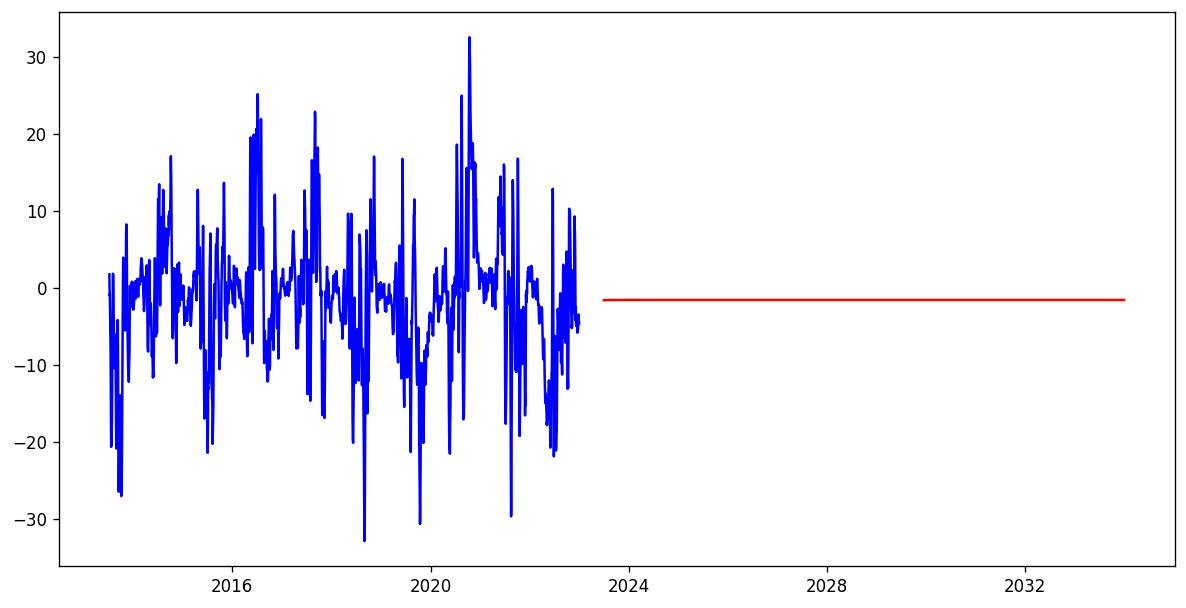

In [58]:
from scipy import stats

# Obtenez les prédictions du modèle pour l'ensemble de données complet
predictions = model_fit.forecast(steps=len(df_seasonal_mean))

# Calculer les intervalles de confiance
forecast_stderr = model_fit.get_prediction(start=0, end=len(df_seasonal_mean) - 1).se_mean
alpha = 0.05  # Niveau de confiance
z_score = stats.norm.ppf(1 - alpha / 2)  # Score Z pour le niveau de confiance
lower_bound = predictions - z_score * forecast_stderr
upper_bound = predictions + z_score * forecast_stderr

# Affichez les prédictions et les intervalles de confiance
print("Prédictions :")
print(predictions)
print("Intervalles de confiance :")
print(lower_bound, upper_bound)

# Générez des graphiques pour évaluer la performance du modèle
plt.figure(figsize=(12, 6))
plt.plot(df_seasonal_mean, label='Observations', color='blue')
plt.plot(predictions, label='Prédictions', color='red')
plt.fill_between(df_seasonal_mean.index, lower_bound, upper_bound, color='pink', alpha=0.3, label='Intervalles de confiance')
plt.legend()
plt.title('Prédictions ARIMA')
plt.xlabel('Date')
plt.ylabel('Valeur')
plt.show()




# AIC

### 1 aic est un score qui permete de comparer différents modéles entre eux sur une même dataset    
### 2 L'AIC (Critère d'Information d'Akaike) fonctionne en évaluant l'ajustement du modèle sur les données d'entraînement et en ajoutant un terme de pénalité pour la complexité du modèle (des principes similaires à la régularisation). Le résultat souhaité est de trouver le plus bas AIC possible, ce qui indique le meilleur équilibre entre l'ajustement du modèle et sa capacité à généraliser.

# 8/. Affichez les résidus du meilleurs des modèles que vous avez jusqu’à présent, pourquoi recherche t-on un bruit blanc ou l’absence de pattern dans ces résidus? Que constatez vous pour le graphique affiché?
